<a href="https://colab.research.google.com/github/mabalda85/Machine_Learning_G5/blob/main/Grupo_5_MachineLearning_AlbertoBalda__DouglasPichucho_Freddy_Espinel_RandySaltos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Descripción de Dataset
- **Nombre**: Estadísticas_de _Edificaciones_2023.csv
- **Fuente de información:** INEC Ecuador.
- **Número de registros:** 22874
- **Número de variables:** 46
- **Contexto**
* Contiene información sobre viviendas en el territorio ecuatoriano.

**Campos Clave:**
* Información Geográfica: codprovf, codcantf, codreg
* Información Temporal: fper, mes, anio
* Características de la Edificación: propie, cimi, piso, estru, pared, cubi, CPERM, CTIPOBR, CORES, NUCUCAL, COAMS, NUPICAL, NUDOCAL, CDISPUSO, CDISPRFI, CVAE, CNUVICAL, CARES, CARNRES, CARDPAR, CAESV, CSUTE, CARCO, CDISPSUT, CDISPARC, SECREDIT, NUVISEC, ESPVERD, DHAB, CINTERN, CSERVB, AEDIF,TOCUP, FIDEIC,	CASAEDIF, TIPFINAN, VALTERR, COSM2

* Variable Independiente: CVAE: Valor total de la edificación calculado, COSM2: Costo estimado del m2 de construcción


**Fase de Selección y carga de datos**
Objetivo: Identificar la estructura y el contenido del dataset Estadísticas_de _Edificaciones_2023.csv

In [20]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

df=pd.read_csv("/content/sample_data/Estadísticas_de _Edificaciones_2023.csv",sep=";")

# Mostrar las 5 primeras filas
print("Mostrar las 5 primeras filas: ")
df.head()

#Estadísticas descriptivas de las varialbes numéricas
print("Estadítica descriptiva:")
df.describe()

Mostrar las 5 primeras filas: 
Estadítica descriptiva:


<ipython-input-20-2509365ff3e3>:13: DtypeWarning: Columns (26,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/sample_data/Estadísticas_de _Edificaciones_2023.csv",sep=";")


,id,anio,CPERM,NUCUCAL,NUPICAL,NUDOCAL,CVAE,CNUVICAL,CARES,CARDPAR,CAESV,CSUTE,NUVISEC,COSM2
count,22873.000000,22873.0,22873.000000,20421.000000,22873.000000,20421.000000,2.287300e+04,22873.000000,22873.000000,22873.000000,22873.000000,22873.000000,22873.000000,22873.000000
mean,228528.567088,2023.0,1.350763,8.060722,1.801600,3.082611,1.410781e+05,1.824946,256.689284,0.786823,530.670703,687.678048,0.137192,380.283347
std,7047.804286,0.0,3.844321,2.575222,0.990989,1.250301,1.007401e+06,6.753146,1587.771162,76.515894,1727.628302,2420.376256,2.033489,433.590017
min,216228.000000,2023.0,1.000000,1.000000,1.000000,1.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222445.000000,2023.0,1.000000,6.000000,1.000000,2.000000,2.738400e+04,1.000000,73.000000,0.000000,48.000000,105.000000,0.000000,250.000000
50%,228212.000000,2023.0,1.000000,8.000000,2.000000,3.000000,5.200000e+04,1.000000,125.000000,0.000000,103.000000,200.000000,0.000000,350.000000
75%,234766.000000,2023.0,1.000000,10.000000,2.000000,4.000000,9.441700e+04,1.000000,235.000000,0.000000,294.000000,440.000000,0.000000,450.000000
max,241037.000000,2023.0,216.000000,85.000000,42.000000,15.000000,6.527479e+07,300.000000,139756.000000,11064.000000,129239.000000,150002.000000,119.000000,30000.000000


# Fase de Procesamiento de datos
## Objetivos: Limpiar y transformar los datos para que estén listos para el análisis.

### Vista de la Estructura del Dataframe y Estadística Descriptiva



In [21]:
# Mostrar las 5 primeras filas
print("Mostrar las 5 primeras filas: ")
df.head()

# Mostrar el resumen de las estructura del dataframe
print("\n Estructura del dataframe: ")
df.info()

# Estadistica descriptiva de las variables numericas
print("\n Estadística descriptivas: ")
df.describe()

Mostrar las 5 primeras filas: 

 Estructura del dataframe: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22873 entries, 0 to 22872
Data columns (total 46 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        22873 non-null  int64  
 1   codprovf  22873 non-null  object 
 2   codcantf  22873 non-null  object 
 3   codreg    22873 non-null  object 
 4   careaur   22873 non-null  object 
 5   fper      22873 non-null  object 
 6   mes       22873 non-null  object 
 7   anio      22873 non-null  int64  
 8   propie    22873 non-null  object 
 9   cimi      22873 non-null  object 
 10  piso      22873 non-null  object 
 11  estru     22873 non-null  object 
 12  pared     22873 non-null  object 
 13  cubi      22873 non-null  object 
 14  CPERM     22873 non-null  int64  
 15  CTIPOBR   22873 non-null  object 
 16  CORES     22873 non-null  object 
 17  NUCUCAL   20421 non-null  float64
 18  COAMS     22873 non-null  object 
 19  NUPICAL

,id,anio,CPERM,NUCUCAL,NUPICAL,NUDOCAL,CVAE,CNUVICAL,CARES,CARDPAR,CAESV,CSUTE,NUVISEC,COSM2
count,22873.000000,22873.0,22873.000000,20421.000000,22873.000000,20421.000000,2.287300e+04,22873.000000,22873.000000,22873.000000,22873.000000,22873.000000,22873.000000,22873.000000
mean,228528.567088,2023.0,1.350763,8.060722,1.801600,3.082611,1.410781e+05,1.824946,256.689284,0.786823,530.670703,687.678048,0.137192,380.283347
std,7047.804286,0.0,3.844321,2.575222,0.990989,1.250301,1.007401e+06,6.753146,1587.771162,76.515894,1727.628302,2420.376256,2.033489,433.590017
min,216228.000000,2023.0,1.000000,1.000000,1.000000,1.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222445.000000,2023.0,1.000000,6.000000,1.000000,2.000000,2.738400e+04,1.000000,73.000000,0.000000,48.000000,105.000000,0.000000,250.000000
50%,228212.000000,2023.0,1.000000,8.000000,2.000000,3.000000,5.200000e+04,1.000000,125.000000,0.000000,103.000000,200.000000,0.000000,350.000000
75%,234766.000000,2023.0,1.000000,10.000000,2.000000,4.000000,9.441700e+04,1.000000,235.000000,0.000000,294.000000,440.000000,0.000000,450.000000
max,241037.000000,2023.0,216.000000,85.000000,42.000000,15.000000,6.527479e+07,300.000000,139756.000000,11064.000000,129239.000000,150002.000000,119.000000,30000.000000


Fase 2: 1. Manejo de valores faltantes:
* Reemplazo (imputación) o eliminación de registros

In [22]:
# Manejo de valores faltantes
print("Valores nulos por columnas: ")
print(df.isnull().sum())

# Estrategia de imputación (por ejemplo con forward fill)
df_clean = df.fillna(method='ffill')

# Conversión de fechas
df_clean['fper'] = pd.to_datetime(df_clean['fper'], format='%d/%m/%Y', errors='coerce')

# Eliminar filas con valores NaN en las columnas relevantes
df = df.dropna(subset=['COSM2', 'CVAE', 'NUCUCAL', 'NUPICAL'])

# Verificar otra vez la estructura
df_clean.info()

Valores nulos por columnas: 
id             0
codprovf       0
codcantf       0
codreg         0
careaur        0
fper           0
mes            0
anio           0
propie         0
cimi           0
piso           0
estru          0
pared          0
cubi           0
CPERM          0
CTIPOBR        0
CORES          0
NUCUCAL     2452
COAMS          0
NUPICAL        0
NUDOCAL     2452
CDISPUSO       0
CDISPRFI       0
CVAE           0
CNUVICAL       0
CARES          0
CARNRES        0
CARDPAR        0
CAESV          0
CSUTE          0
CARCO          0
CDISPSUT       0
CDISPARC       0
SECREDIT       0
NUVISEC        0
ESPVERD        0
DHAB           0
CINTERN        0
CSERVB         0
AEDIF          0
TOCUP          0
FIDEIC         0
CASAEDIF       0
TIPFINAN       0
VALTERR        0
COSM2          0
dtype: int64


<ipython-input-22-f7543482191e>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean = df.fillna(method='ffill')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22873 entries, 0 to 22872
Data columns (total 46 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        22873 non-null  int64         
 1   codprovf  22873 non-null  object        
 2   codcantf  22873 non-null  object        
 3   codreg    22873 non-null  object        
 4   careaur   22873 non-null  object        
 5   fper      22873 non-null  datetime64[ns]
 6   mes       22873 non-null  object        
 7   anio      22873 non-null  int64         
 8   propie    22873 non-null  object        
 9   cimi      22873 non-null  object        
 10  piso      22873 non-null  object        
 11  estru     22873 non-null  object        
 12  pared     22873 non-null  object        
 13  cubi      22873 non-null  object        
 14  CPERM     22873 non-null  int64         
 15  CTIPOBR   22873 non-null  object        
 16  CORES     22873 non-null  object        
 17  NUCUCAL   22

##Fase 3: Método PCA
**Tipos de Variables:**
* Origen y valor del financiamiento: CVAE, COSM2
* Uso, características de la edificación - Número total de cuartos: NUCUCAL,NUPICAL

Varianza explicada por cada componente principal:  [9.99999815e-01 1.85193990e-07]
Varianza total explicada:  0.9999999999923906


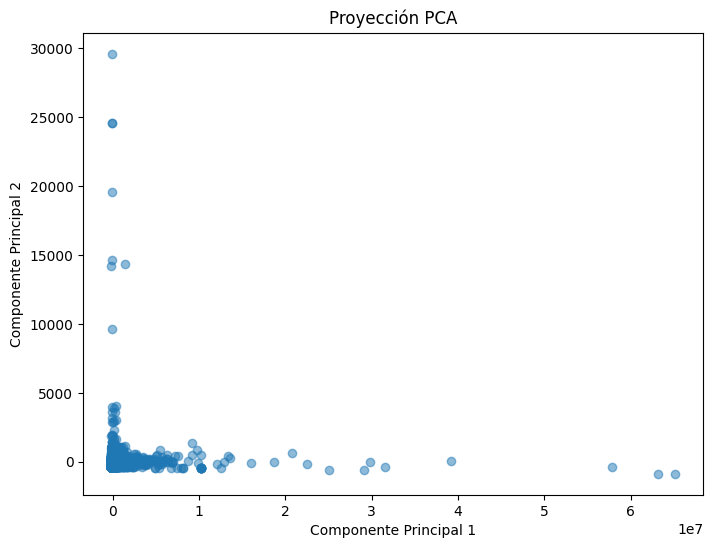

In [23]:
# Supongamos que seleccionamos estas variables numéricas
features_pca = ['CVAE','COSM2','NUCUCAL','NUPICAL']

# Crear un dataframe solo con esas columnas
df_numeric = df_clean[features_pca].dropna()

# Aplicar PCA para reducir a 2 componentes
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_numeric)

# Imprimir la varianza explicada
print('Varianza explicada por cada componente principal: ', pca.explained_variance_ratio_)
print("Varianza total explicada: ", sum(pca.explained_variance_ratio_))

# Visualización en 2D
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Proyección PCA')
plt.show()

## Interpretación de PCA

* Los datos indican que el primer componente principal (PC1) explica casi toda la varianza del conjunto de datos, con un valor de 99.9999815%. El segundo componente principal (PC2) explica una cantidad extremadamente pequeña de la varianza, solo 0.000018519399%. En conjunto, la varianza total explicada por ambos componentes es prácticamente 100% (99.99999999923906%).

* Esto significa que PC1 captura casi toda la información y variabilidad del conjunto de datos, mientras que PC2 añade muy poca información adicional. En términos prácticos, esto sugiere que el análisis de componentes principales ha reducido efectivamente la dimensionalidad del conjunto de datos, manteniendo casi toda la información relevante en solo dos componentes.

##Regresión Lineal
Método estadístico utilizado para modelar la relación entre una variable dependiente y una o más variables independientes.

Error cuadrático medio: 3.925031741977478
Coeficientes: [[ 1.26394599e-04 -2.70973304e-07]
 [ 1.94631499e-05  7.35891356e-07]]
Intersección: [8.03967354 1.74604687]


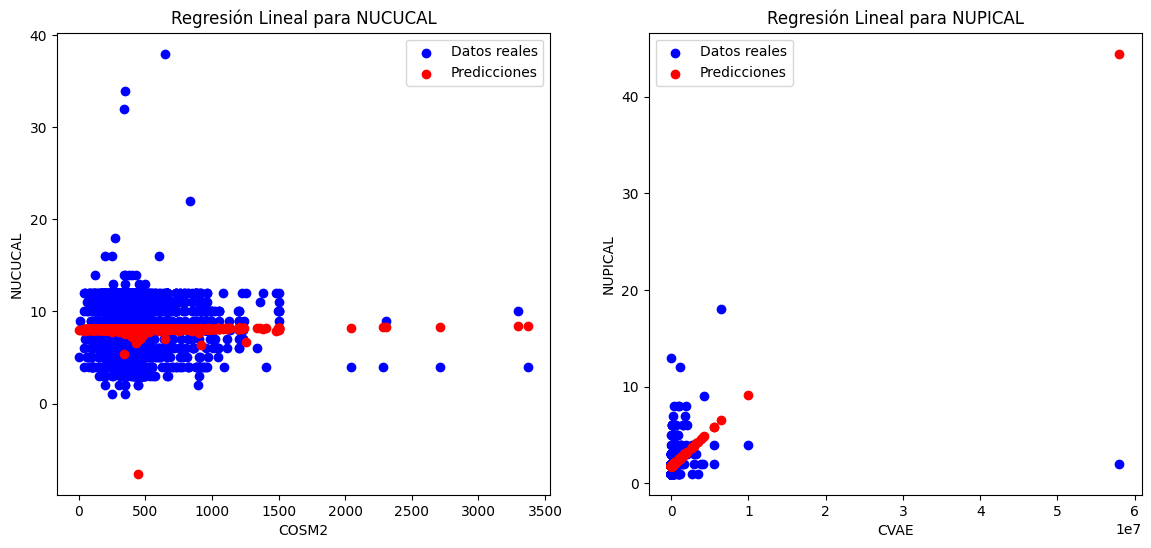

In [26]:

# Seleccionar las variables independientes y dependientes
X = df[['COSM2', 'CVAE']]
Y = df[['NUCUCAL', 'NUPICAL']]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, Y_train)

# Hacer predicciones
Y_pred = model.predict(X_test)

# Graficar la regresión lineal para cada variable dependiente
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Evaluar el modelo
mse = mean_squared_error(Y_test, Y_pred)
print(f'Error cuadrático medio: {mse}')
print(f'Coeficientes: {model.coef_}')
print(f'Intersección: {model.intercept_}')

# Graficar para NUCUCAL
axs[0].scatter(X_test['COSM2'], Y_test['NUCUCAL'], color='blue', label='Datos reales')
axs[0].scatter(X_test['COSM2'], Y_pred[:, 0], color='red', label='Predicciones')
axs[0].set_title('Regresión Lineal para NUCUCAL')
axs[0].set_xlabel('COSM2')
axs[0].set_ylabel('NUCUCAL')
axs[0].legend()

# Graficar para NUPICAL
axs[1].scatter(X_test['CVAE'], Y_test['NUPICAL'], color='blue', label='Datos reales')
axs[1].scatter(X_test['CVAE'], Y_pred[:, 1], color='red', label='Predicciones')
axs[1].set_title('Regresión Lineal para NUPICAL')
axs[1].set_xlabel('CVAE')
axs[1].set_ylabel('NUPICAL')
axs[1].legend()

plt.show()

##Interpretación de la Regresión Lineal
* El modelo sugiere que COSM2 tiene una influencia positiva en ambas variables dependientes (NUCUCAL y NUPICAL), mientras que CVAE tiene una influencia muy pequeña y mixta (ligeramente negativa en NUCUCAL y positiva en NUPICAL).
* La calidad del modelo, medida por el MSE, es razonable, pero siempre es importante considerar el contexto y el rango de los datos para una interpretación más precisa.

## Fase 4 Minería de Datos

**Aprendizaje no supervisado:** Clustering con el **método K-means** para seleccionar el número de clusters.

**Método para evaluar el número de clusters:** Método del codo (Elbow)

El método del codo identifica un punto o "codo" en la gráfica de la suma de los errores cuadrados (WCSS) frente al número de clusters. Este punto suele indicar que agregar más clusters no mejora significativamente la agrupación.

Número de Clusters: 1, WCSS: 2.321182178330684e+16
Número de Clusters: 2, WCSS: 8442347200290928.0
Número de Clusters: 3, WCSS: 4340348081996331.0
Número de Clusters: 4, WCSS: 2050544838987833.0
Número de Clusters: 5, WCSS: 1210851382729045.8
Número de Clusters: 6, WCSS: 822338849732505.8
Número de Clusters: 7, WCSS: 655090769187298.6
Número de Clusters: 8, WCSS: 450419857116026.75
Número de Clusters: 9, WCSS: 411828254743414.5
Número de Clusters: 10, WCSS: 327484055153267.3


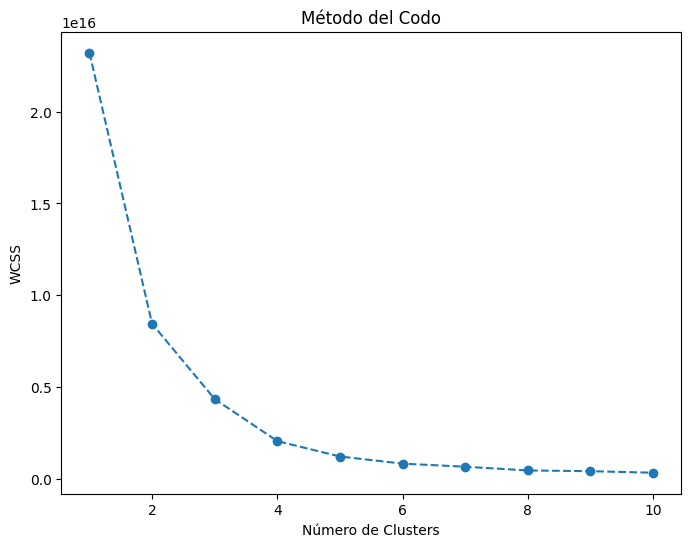

In [27]:
# Método del codo para encontrar el número óptimo de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)
    print(f'Número de Clusters: {i}, WCSS: {kmeans.inertia_}')  # Imprimir valores de WCSS

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS') #WCSS significa Within-Cluster Sum of Squares (Suma de Cuadrados Dentro del Cluster).
plt.title('Método del Codo')
plt.show()


## Interpretación Método K-means
* En la gráfica del método del codo, se observa una rápida disminución de la WCSS (suma de los errores cuadrados) hasta alcanzar un determinado número de clusters, tras lo cual la disminución se vuelve menos pronunciada.
* En este caso, el "codo" parece situarse alrededor de los **4 o 5 clusters**, ya que a partir de este punto, la reducción de la WCSS es menos significativa.

## Método de la Silueta
 El método de la silueta es una técnica utilizada para evaluar la calidad de los clusters en un conjunto de datos.

In [ ]:
# Método de la silueta para encontrar el número óptimo de clusters
silhouette_avg = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_result)
    silhouette_avg.append(silhouette_score(pca_result, cluster_labels))

# Imprimir los valores de los clusters y sus puntuaciones de silueta promedio
for n_clusters, score in zip(range(2, 11), silhouette_avg):
    print(f"Número de Clusters: {n_clusters}, Puntuación de Silueta Promedio: {score}")

# Graficar el método de la silueta
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_avg, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de Silueta Promedio')
plt.title('Método de la Silueta')
plt.show()

## Interpretación de los Resultados Método de la Silueta

* Los resultados del método de la silueta indican que **dos clusters** proporcionan la mejor agrupación de los datos, con una puntuación de silueta promedio muy alta de 0.9950.

* A medida que se incrementa el número de clusters, la calidad del agrupamiento disminuye gradualmente, lo que sugiere que agregar más clusters no mejora la definición de los grupos.

* Por lo tanto, dos clusters son la opción óptima para este conjunto de datos.

## Comparativa del Método de la Silueta y K-Means

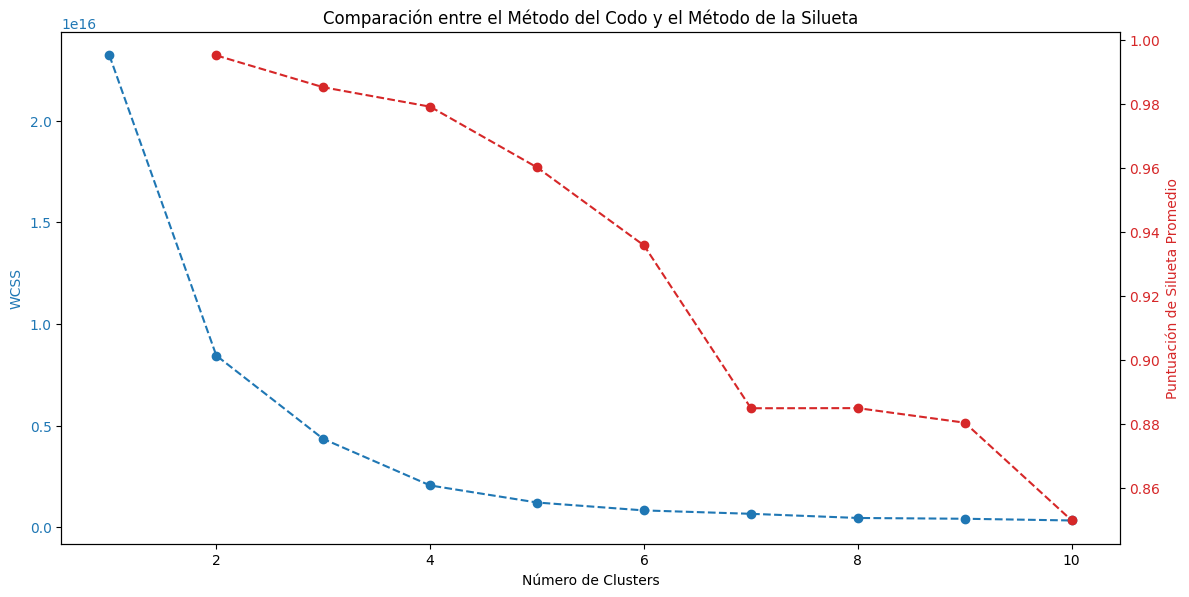

In [7]:
# Graficar la comparación entre el método del codo y el método de la silueta
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Número de Clusters')
ax1.set_ylabel('WCSS', color=color)
ax1.plot(range(1, 11), wcss, marker='o', linestyle='--', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Puntuación de Silueta Promedio', color=color)
ax2.plot(range(2, 11), silhouette_avg, marker='o', linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Comparación entre el Método del Codo y el Método de la Silueta')
plt.show()

## Resumen: Método del Codo y Silueta
•	El método del codo es más intuitivo y fácil de interpretar visualmente, mientras que el método de la silueta proporciona una evaluación más precisa de la calidad de los clusters.

•	El método de la silueta tiende a ser más preciso en la evaluación de la calidad de los clusters, pero puede ser más costoso computacionalmente.

•	Ambos métodos son útiles y pueden complementarse. En casos donde el codo no es claro, el método de la silueta puede ofrecer una mejor alternativa.


## Algoritmo Apriori y Reglas de Asociación
El objetivo es decubrir relaciones interesantes entre variables: CVAE, COSM2, NUCUCAL, NUPICAL

In [10]:
# Definir las columnas necesarias
columns_needed = ['CVAE', 'COSM2', 'NUCUCAL', 'NUPICAL']  # Ajusta según sea necesario
df = df[columns_needed]

# Aplicar el algoritmo Apriori para encontrar conjuntos frecuentes con un mayor min_support
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

# Generar las reglas de asociación
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Filtrar las reglas para incluir solo aquellas que contengan 'CVAE', 'COSM2', 'NUCUCAL', 'NUPICAL'
filtered_rules = rules[rules['antecedents'].apply(lambda x: any(item in frozenset(x) for item in ['CVAE', 'COSM2', 'NUCUCAL', 'NUPICAL'])) |
                       rules['consequents'].apply(lambda x: any(item in frozenset(x) for item in ['CVAE', 'COSM2', 'NUCUCAL', 'NUPICAL']))]

# Imprimir las reglas filtradas
print(filtered_rules)

                  antecedents                consequents  antecedent support  \
0                     (COSM2)                     (CVAE)            0.974555   
1                      (CVAE)                    (COSM2)            1.000000   
2                   (NUCUCAL)                     (CVAE)            1.000000   
3                      (CVAE)                  (NUCUCAL)            1.000000   
4                   (NUPICAL)                     (CVAE)            1.000000   
5                      (CVAE)                  (NUPICAL)            1.000000   
6                   (NUCUCAL)                    (COSM2)            1.000000   
7                     (COSM2)                  (NUCUCAL)            0.974555   
8                   (NUPICAL)                    (COSM2)            1.000000   
9                     (COSM2)                  (NUPICAL)            0.974555   
10                  (NUPICAL)                  (NUCUCAL)            1.000000   
11                  (NUCUCAL)           

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


## Interpretación del resultado del Algoritmo Apriori y Regla de Asociación

* El análisis de los datos muestra que todas las reglas de asociación tienen un soporte y confianza altos, con valores de 0.974555 o 1.0, lo que indica que las combinaciones de variables 'CVAE', 'COSM2', 'NUCUCAL' y 'NUPICAL' son muy frecuentes y confiables en el conjunto de datos.
* Además, el valor de lift es 1.0 para todas las reglas, lo que sugiere que no hay una asociación más fuerte de lo esperado por azar.
* Las variables están altamente correlacionadas y aparecen juntas con frecuencia en el conjunto de datos.

## Precisión, recall, F1-score, AUC-ROC y validación cruzada

In [9]:
# Definir las columnas necesarias
columns_needed = ['CVAE', 'COSM2', 'NUCUCAL', 'NUPICAL']
df = df[columns_needed]

# Convertir los valores a booleanos
df = df.astype(bool)

# Dividir los datos en características (X) y etiquetas (y)
X = df[['CVAE', 'NUCUCAL', 'NUPICAL']]
y = df['COSM2']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar un modelo de clasificación (Random Forest en este caso)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Validación cruzada
cv_scores = cross_val_score(model, X, y, cv=5)

# Imprimir las métricas
print(f"Precisión: {accuracy}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"AUC-ROC: {auc_roc}")
print(f"Validación Cruzada (5-fold): {cv_scores.mean()}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Matriz de Confusión:\n{conf_matrix}")

Precisión: 0.9734771203730691
Recall: 1.0
F1-Score: 0.986560330822626
AUC-ROC: 0.5
Validación Cruzada (5-fold): 0.9745551597171946
Matriz de Confusión:
[[   0  182]
 [   0 6680]]


## Interpretación Precisión, recall, F1-score, AUC-ROC y validación cruzada
* Los resultados indican que el modelo de clasificación tiene un rendimiento muy alto en términos de precisión (97.35%) y recall (100%), lo que significa que casi todas las predicciones fueron correctas y todas las instancias positivas fueron identificadas correctamente.
* El F1-Score de 0.987 refleja un buen equilibrio entre precisión y recall.
* Sin embargo, el AUC-ROC de 0.5 sugiere que el modelo no es capaz de distinguir entre las clases mejor que un clasificador aleatorio.
* La validación cruzada (5-fold) también muestra una alta precisión promedio de 97.46%, lo que indica que el modelo generaliza bien en diferentes subconjuntos de datos.
* La matriz de confusión muestra que el modelo no predijo ninguna instancia negativa correctamente, lo que podría ser un área de mejora.

## Graficación de Precisión, Recall, F1-score, AUC-ROC y Validación cruzada

Precisión: 0.9734771203730691
Recall: 1.0
F1-Score: 0.986560330822626
AUC-ROC: 0.5
Validación Cruzada (5-fold): 0.9745551597171946
Matriz de Confusión:
[[   0  182]
 [   0 6680]]


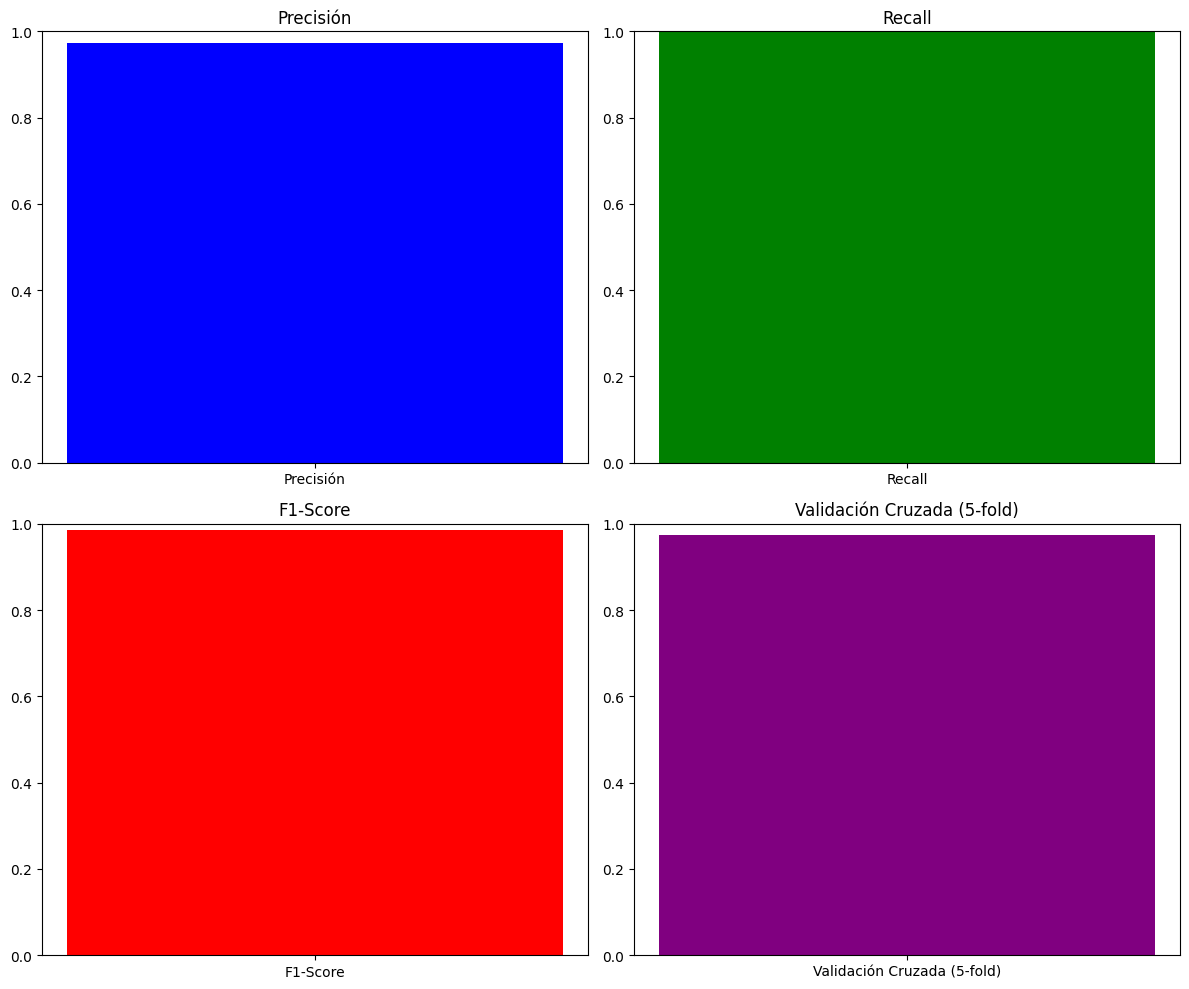

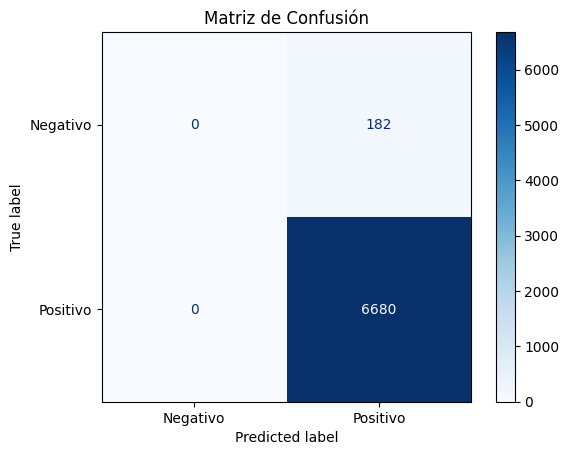

In [11]:
# Filtrar las columnas necesarias
columns_needed = ['CVAE', 'COSM2', 'NUCUCAL', 'NUPICAL']
df = df[columns_needed]

# Convertir los valores a booleanos
df = df.astype(bool)

# Dividir los datos en características (X) y etiquetas (y)
X = df[['CVAE', 'NUCUCAL', 'NUPICAL']]
y = df['COSM2']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar un modelo de clasificación (Random Forest en este caso)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_prob)

# Validación cruzada
cv_scores = cross_val_score(model, X, y, cv=5)

# Imprimir las métricas
print(f"Precisión: {accuracy}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"AUC-ROC: {auc_roc}")
print(f"Validación Cruzada (5-fold): {cv_scores.mean()}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Matriz de Confusión:\n{conf_matrix}")

# Graficar las métricas de evaluación

# Crear una figura con subplots
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Gráfico de Precisión
ax[0, 0].bar(['Precisión'], [accuracy], color='blue')
ax[0, 0].set_ylim(0, 1)
ax[0, 0].set_title('Precisión')

# Gráfico de Recall
ax[0, 1].bar(['Recall'], [recall], color='green')
ax[0, 1].set_ylim(0, 1)
ax[0, 1].set_title('Recall')

# Gráfico de F1-Score
ax[1, 0].bar(['F1-Score'], [f1], color='red')
ax[1, 0].set_ylim(0, 1)
ax[1, 0].set_title('F1-Score')

# Gráfico de Validación Cruzada (5-fold)
ax[1, 1].bar(['Validación Cruzada (5-fold)'], [cv_scores.mean()], color='purple')
ax[1, 1].set_ylim(0, 1)
ax[1, 1].set_title('Validación Cruzada (5-fold)')

# Ajustar el layout
plt.tight_layout()

# Mostrar los gráficos
plt.show()

# Graficar la matriz de confusión
conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Negativo', 'Positivo'])
conf_matrix_display.plot(cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()

**Interpretación**
•	Filas: Representan las clases verdaderas (etiquetas reales).
•	Columnas: Representan las clases predichas (etiquetas predichas).

**Clase 0 (Primera Fila)**

•	Verdaderos Negativos (0): No hay instancias de la clase 0 que hayan sido correctamente clasificadas como clase 0.

•	Falsos Positivos (182): Hay 182 instancias de la clase 0 que han sido incorrectamente clasificadas como clase 1.

**Clase 1 (Segunda Fila)**

•	Falsos Negativos (0): No hay instancias de la clase 1 que hayan sido incorrectamente clasificadas como clase 0.

•	Verdaderos Positivos (6680): Hay 6680 instancias de la clase 1 que han sido correctamente clasificadas como clase 1.

**Conclusión**

•	Clase 0: El modelo no ha clasificado correctamente ninguna instancia de la clase 0, todas han sido clasificadas incorrectamente como clase 1.

•	Clase 1: El modelo ha clasificado correctamente todas las instancias de la clase 1.

• Esto sugiere que el modelo tiene un sesgo significativo hacia la clase 1, clasificando todas las instancias como clase 1 y ninguna como clase 0.